Mean Squared Error: 0.6544573029251667


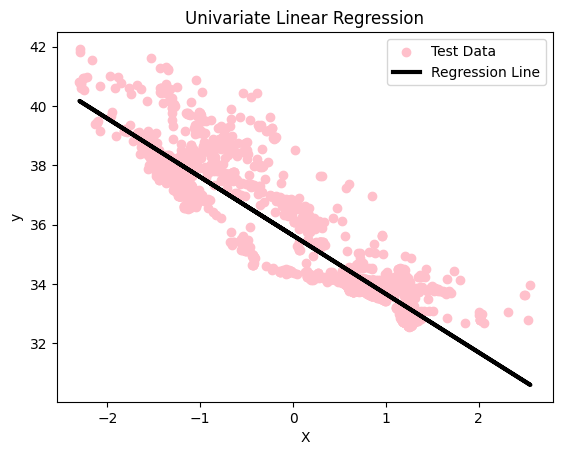

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/sample_data/california_housing_test.csv')
X = data['longitude'].values
y = data['latitude'].values

# Normalize the features (optional, but can help convergence of gradient descent)
X = (X - np.mean(X)) / np.std(X)

# Add a column of ones to X for the bias term
X_b = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters (weights) randomly
theta = np.random.rand(2)

# Set hyperparameters
alpha = 0.01  # learning rate
iterations = 1000  # number of iterations for gradient descent

# Gradient Descent
for i in range(iterations):
    # Calculate predictions
    predictions = X_b.dot(theta)

    # Calculate errors
    errors = predictions - y

    # Update parameters using gradient descent formula
    gradient = X_b.T.dot(errors) / len(y)
    theta = theta - alpha * gradient

# Make predictions on test data
X_test_b = np.c_[np.ones(X.shape[0]), X]
predictions = X_test_b.dot(theta)

# Calculate mean squared error
mse = np.mean((predictions - y) ** 2)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(X, y, color='pink', label='Test Data')
plt.plot(X, predictions, color='black', linewidth=3, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Univariate Linear Regression')
plt.show()


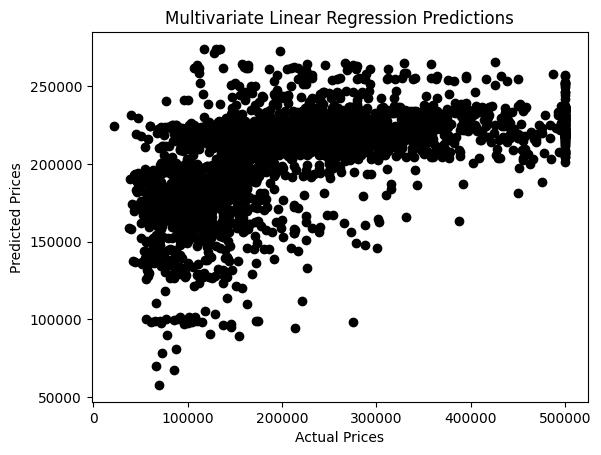

Parameters (weights) of the model: [205837.3883652  -72673.24338739 -77829.76983181]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Selecting features (independent variables) and target (dependent variable)
X = data[['longitude', 'latitude']].values
y = data['median_house_value'].values

# Feature normalization (optional but can help convergence)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add a column of ones to X for the bias term
X_b = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters (weights) randomly
theta = np.random.rand(3)

# Set hyperparameters
alpha = 0.01  # learning rate
iterations = 1000  # number of iterations for gradient descent

# Gradient Descent
for i in range(iterations):
    predictions = X_b.dot(theta)
    errors = predictions - y
    gradient = X_b.T.dot(errors) / len(y)
    theta = theta - alpha * gradient

# Predictions
predicted_prices = X_b.dot(theta)

# Plot the results
plt.scatter(y, predicted_prices, color='black')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multivariate Linear Regression Predictions')
plt.show()

# Print the parameters (weights) of the model
print(f'Parameters (weights) of the model: {theta}')


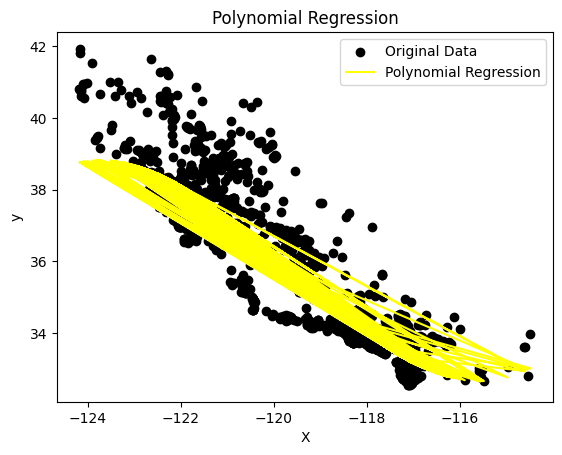

Coefficients of the polynomial regression model: [[3.88649953e+04]
 [9.75797240e+02]
 [8.16456447e+00]
 [2.27447464e-02]]


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Selecting feature and target
X = data['longitude'].values
y = data['latitude'].values

# Reshape X and y to column vectors
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Define the degree of the polynomial
degree = 3

# Create polynomial features (X^0, X^1, X^2, ..., X^n)
X_poly = np.concatenate([X ** i for i in range(degree + 1)], axis=1)

# Perform linear regression on the polynomial features
theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

# Generate predictions using the learned parameters
predictions = X_poly.dot(theta)

# Plot the results
plt.scatter(X, y, color='black', label='Original Data')
plt.plot(X, predictions, color='yellow', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

# Print the parameters (coefficients) of the polynomial regression model
print(f'Coefficients of the polynomial regression model: {theta}')
